# Ассоциативные правила

Обучение на ассоциативных правилах (далее Associations rules learning — ARL) представляет из себя, с одной стороны, простой, с другой — довольно часто применимый в реальной жизни метод поиска взаимосвязей (ассоциаций) в датасетах, или, если точнее, айтемсетах (itemsests).

В общем виде ARL можно описать как «Кто купил x, также купил y». В основе лежит анализ транзакций, внутри каждой из которых лежит свой уникальный itemset из набора items. При помощи ARL алогритмов находятся те самые «правила» совпадения items внутри одной транзакции, которые потом сортируются по их силе. Все, в общем, просто.

В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (нет, там продавали не наркотики и даже не лекарства, точнее, не только лекартсва. Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». К сожалению такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

## Описание Association rule

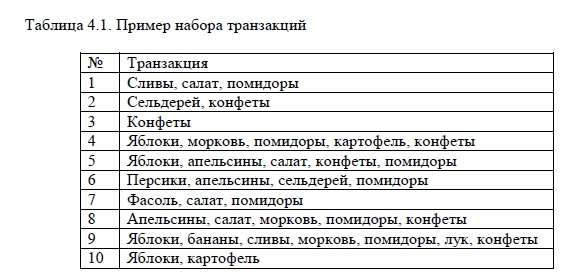

Визуальный анализ примера показывает, что все четыре транзакции, в которых фигурирует салат, также включают помидоры и что четыре из семи транзакций, содержащих помидоры, также содержат салат. Салат и помидоры в большинстве случаев покупаются вместе. Ассоциативные правила позволяют обнаруживать и количественно описывать такие совпадения.

Ассоциативное правило состоит из двух наборов предметов, называемых условием (antecedent) и следствием (consequent), записываемых в виде X →Y ,что читается так: "Из X следует Y".

Таким образом, ассоциативное правило формулируется в виде: `«Если условие, то следствие»`. 
Условие может ограничиваться только одним предметом. Правила обычно отображаются с помощью
стрелок, направленных от условия к следствию, например, помидоры –> салат.

Ассоциативные правила описывают связь между наборами предметов, соответствующими условию и следствию. Эта связь характеризуется двумя показателями — `поддержкой (support)` и `достоверностью (confidence)`. Обозначим базу данных транзакций как D , а число транзакций в этой базе как N . Каждая транзакция Di представляет собой некоторый набор предметов.

Обозначим через `S поддержку`, `через C — достоверность`. Поддержка ассоциативного правила — это доля транзакций, которые содержат как условие, так и следствие.

Достоверность ассоциативного правила A → B представляет собой меру точности правила и определяется как отношение количества транзакций, содержащих и условие, и следствие, к количеству транзакций, содержащих только условие

![img](https://drive.google.com/uc?id=19QuYNx-DseNW4nzwAdxgzzdqp7QNd5Eh)


Ранее все используемые библиотеки уже были предустановлены
и доступны для подключения и в Jupyter, и в Google Colab. С помощью    инструкции    pip    выполним    установку    библиотеки    apyori
(pip install apyori) и подключим нужную функцию apriori, а также
проведем загрузку данных. Если вы устанавливаете а Anacobda то команда будет (conda install apyori).


In [1]:
import pandas as pd
import numpy as np


In [2]:
from apyori import apriori


In [3]:
# загрузим данные
dataset = pd.read_csv("../dataset/Market_Basket_Optimisation.csv")
# dataset = pd.read_csv('/content/SPO_PGU/groceries - groceries.csv')
# посомтрим на датасет
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что датасет у нас представляет разреженную матрицу, где в строках у нас набор items в каждой транзакции.

Заменим NaN на последнее значение внутри транзакции, чтобы потом было легче обрабатывать весь датасет.

In [4]:
converted_data = dataset.fillna(method = 'ffill', axis = 1)

C:\Users\iteco\AppData\Local\Temp\ipykernel_9888\2759922142.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  converted_data = dataset.fillna(method = 'ffill', axis = 1)


In [5]:
converted_data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs
1,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney,chutney
2,turkey,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado,avocado
3,mineral water,milk,energy bar,whole wheat rice,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea
4,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt,low fat yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread,fresh bread
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea
7497,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken,chicken
7498,escalope,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea


In [6]:
#создаим из них матрицу
transactions = []
for i in range(0, 7500):
    transactions.append([str(converted_data.values[i,j]) for j in range(0, 20)])
print('end')

end


In [7]:
result = list(apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))
association_results = list(result)
print(len(result))

23


In [8]:
print(result[0])

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])


In [9]:
ruls=[]
for item in result:

    # первый индекс внутреннего списка
    # Содержит базовый предмет и добавляет предмет
    pair = item[0]
    items = [x for x in pair]
    v1=str(items[0])
    v2= str(items[1])

    #второй индекс внутреннего списка
    v3= str(item[1])

    #третий индекс списка, расположенный на 0-м месте
    #третьего индекса внутреннего списка

    v4= str(item[2][0][2])
    v5=str(item[2][0][3])
    rows=(v1,v2,v3,v4,v5)
    ruls.append(rows)
label=['title1','title2','suppot','confidence','lift']
nm=pd.DataFrame.from_records(ruls,columns=label)


In [10]:
nm.sort_values(by=['lift'], ascending=True).head(20)

,title1,title2,suppot,confidence,lift
10,ground beef,spaghetti,0.0064,0.3934426229508197,4.003825878061259
21,spaghetti,frozen vegetables,0.0033333333333333335,0.390625,4.097465034965035
3,olive oil,whole wheat pasta,0.008,0.2714932126696833,4.130221288078346
12,soup,olive oil,0.0036,0.21093749999999997,4.174224934036939
8,ground beef,eggs,0.0041333333333333335,0.20666666666666667,4.177897574123989
16,spaghetti,mineral water,0.0032,0.20512820512820515,4.273504273504273
13,soup,tomatoes,0.0030666666666666668,0.21904761904761905,4.334715416509612
18,ground beef,spaghetti,0.0044,0.25984251968503935,4.350042182227221
5,frozen vegetables,cake,0.0030666666666666668,0.2987012987012987,4.366978051188577
22,ground beef,spaghetti,0.0030666666666666668,0.26136363636363635,4.375507305194805


In [11]:
nm.sort_values(by=['confidence'], ascending=False).head(20)

,title1,title2,suppot,confidence,lift
6,cereals,spaghetti,0.0030666666666666668,0.45999999999999996,4.681139755766621
7,ground beef,chocolate,0.004,0.4411764705882353,4.489584164737808
14,olive oil,mineral water,0.0038666666666666667,0.4027777777777778,6.127450980392156
10,ground beef,spaghetti,0.0064,0.3934426229508197,4.003825878061259
21,spaghetti,frozen vegetables,0.0033333333333333335,0.390625,4.097465034965035
20,soup,frozen vegetables,0.0030666666666666668,0.38333333333333336,7.986111111111112
1,pasta,escalope,0.005866666666666667,0.37288135593220345,4.700185158809287
15,chocolate,frozen vegetables,0.0032,0.32876712328767127,4.608884905901934
4,pasta,shrimp,0.005066666666666666,0.3220338983050848,4.514493901473151
5,frozen vegetables,cake,0.0030666666666666668,0.2987012987012987,4.366978051188577


Так как первый стобец в выборки это порядковый номер, удалим этот столбец.

1. Используя   файл   демонстрационного   примера    https://www.kaggle.com/d4rklucif3r/market-basket-optimisation, построить ассоциативные 
правила для некоторой торговой фирмы.
2. Провести  анализ  рыночной  корзины  
3.
– найти правила, представляющие интерес;
– найти правило, имеющее максимальный лифт;
– найти  товары,  которые  покупают  вместе  с  поздравительной  открыткой, какая    из    этих    ассоциаций    представляет    наибольший    интерес    (имеет максимальный лифт).


10 спагетти с говяжьим фаршем
21 замороженный овощ спагетти
3 макароны из цельнозерновой муки с оливковым маслом
12 супов оливкового масла
8 яиц из говяжьего фарша
16 спагетти минеральная вода
13 суповых помидоров
18 спагетти с говяжьим фаршем
Торт из 5 замороженных овощей
22 спагетти с говяжьим фаршем
7 говяжьих фаршей в шоколаде
4 макаронные креветки